In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rc('legend',fontsize=18)

## Load Data

In [2]:
def add_theories(paths, start=1, stop=100):
    theories = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"theory_{}.csv".format(i))) & (i<=stop):
            theory = pd.read_csv(path+"theory_{}.csv".format(i))
            theories.append(theory)
            i += 1
    return pd.concat(theories)

def add_xi2s(paths, start=1, stop=100):
    theories = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"xi2s_{}.csv".format(i))) & (i<=stop):
            theory = pd.read_csv(path+"xi2s_{}.csv".format(i))
            theories.append(theory)
            i += 1
    return pd.concat(theories)

def add_chains(paths, start=1, stop=100):
    chains = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"chain_{}.csv".format(i))) & (i<=stop):
            chain = pd.read_csv(path+"chain_{}.csv".format(i))
            chains.append(chain)
            i += 1
    return pd.concat(chains)

In [3]:
data_wlwl = pd.read_csv("data/DESY1/data_wlwl.csv")
data_gcgc = pd.read_csv("data/DESY1/data_gcgc.csv")
data_3x2 = pd.read_csv("data/DESY1/data_3x2.csv")
idx_wlwl = pd.read_csv("data/DESY1/idx_wlwl.csv")
idx_gcgc = pd.read_csv("data/DESY1/idx_gcgc.csv")
idx_3x2 = pd.read_csv("data/DESY1/idx_3x2.csv")
files_wlwl = np.load("data/DESY1/files_wlwl.npz")
files_gcgc = np.load("data/DESY1/files_gcgc.npz")
files_3x2 = np.load("data/DESY1/files_3x2.npz")

In [4]:
pairs_wlwl =  [
    ["DESwl__0", "DESwl__0"],
    ["DESwl__0", "DESwl__1"],
    ["DESwl__0", "DESwl__2"],
    ["DESwl__0", "DESwl__3"],
    ["DESwl__1", "DESwl__1"],
    ["DESwl__1", "DESwl__2"],
    ["DESwl__1", "DESwl__3"],
    ["DESwl__2", "DESwl__2"],
    ["DESwl__2", "DESwl__3"],
    ["DESwl__3", "DESwl__3"]]
pairs_gcgc = [
    ["DESgc__0", "DESgc__0"],
    ["DESgc__1", "DESgc__1"],
    ["DESgc__2", "DESgc__2"],
    ["DESgc__3", "DESgc__3"],
    ["DESgc__4", "DESgc__4"]]
pairs_3x2 = [
    ["DESgc__0", "DESgc__0"],
    ["DESgc__1", "DESgc__1"], 
    ["DESgc__2", "DESgc__2"], 
    ["DESgc__3", "DESgc__3"], 
    ["DESgc__4", "DESgc__4"], 
    ["DESgc__0", "DESwl__0"], 
    ["DESgc__0", "DESwl__1"], 
    ["DESgc__0", "DESwl__2"], 
    ["DESgc__0", "DESwl__3"], 
    ["DESgc__1", "DESwl__0"], 
    ["DESgc__1", "DESwl__1"], 
    ["DESgc__1", "DESwl__2"], 
    ["DESgc__1", "DESwl__3"], 
    ["DESgc__2", "DESwl__0"], 
    ["DESgc__2", "DESwl__1"], 
    ["DESgc__2", "DESwl__2"], 
    ["DESgc__2", "DESwl__3"], 
    ["DESgc__3", "DESwl__0"], 
    ["DESgc__3", "DESwl__1"], 
    ["DESgc__3", "DESwl__2"], 
    ["DESgc__3", "DESwl__3"], 
    ["DESgc__4", "DESwl__0"], 
    ["DESgc__4", "DESwl__1"], 
    ["DESgc__4", "DESwl__2"],
    ["DESgc__4", "DESwl__3"], 
    ["DESwl__0", "DESwl__0"], 
    ["DESwl__0", "DESwl__1"], 
    ["DESwl__0", "DESwl__2"], 
    ["DESwl__0", "DESwl__3"], 
    ["DESwl__1", "DESwl__1"], 
    ["DESwl__1", "DESwl__2"], 
    ["DESwl__1", "DESwl__3"], 
    ["DESwl__2", "DESwl__2"], 
    ["DESwl__2", "DESwl__3"], 
    ["DESwl__3", "DESwl__3"]]


In [50]:
path_dzs_wlwl_num = "chains/numerical/DES_wlwl_dz_num_TAP_0.65_init_ϵ_0.03/"
path_dzs_gcgc_num = "chains/numerical/DES_gcgc_dz_num_TAP_0.65_init_ϵ_0.03/"
path_dzs_3x2_num = "chains/numerical/DES_3x2_dz_num_TAP_0.65_init_ϵ_0.03/"

path_dzs_wlwl_ana = "chains/analytical/DES_wlwl_dz_ana_TAP_0.65_init_ϵ_0.03/"
path_dzs_gcgc_ana = "chains/analytical/DES_gcgc_dz_ana_TAP_0.65_init_ϵ_0.03/"
path_dzs_3x2_ana = "chains/analytical/DES_3x2_dz_ana_TAP_0.65_init_ϵ_0.03/"

path_nzs_wlwl_num = "chains/numerical/DES_wlwl_nz_num_Gibbs_TAP_0.65/"
path_nzs_gcgc_num = "chains/numerical/DES_gcgc_nz_num_TAP_0.65_init_ϵ_0.03/"
path_nzs_3x2_num = "chains/numerical/DES_3x2_nz_num_TAP_0.65_init_ϵ_0.03/"

path_nzs_wlwl_ana = "chains/analytical/DES_wlwl_nz_ana_TAP_0.65_init_ϵ_0.03/"
path_nzs_gcgc_ana = "chains/analytical/DES_gcgc_nz_ana_TAP_0.65_init_ϵ_0.03/"
path_nzs_3x2_ana = "chains/analytical/DES_3x2_nz_ana_TAP_0.65_init_ϵ_0.03/"

path_dzs_wlwl_nomarg = "chains/nomarg/DES_wlwl_nomarg_TAP_0.65_init_ϵ_0.03/"
path_dzs_gcgc_nomarg = "chains/nomarg/DES_gcgc_nomarg_TAP_0.65_init_ϵ_0.03/"
path_dzs_3x2_nomarg = "chains/nomarg/DES_3x2_nomarg_TAP_0.65_init_ϵ_0.03/"

In [51]:
theories_dzs_wlwl_nomarg = add_theories([path_dzs_wlwl_nomarg])
theories_dzs_gcgc_nomarg = add_theories([path_dzs_gcgc_nomarg])
theories_dzs_3x2_nomarg =  add_theories([path_dzs_3x2_nomarg])

In [52]:
def make_cls_m_s(ts):
    tss = [np.array(np.matrix(t)).ravel() for t in ts["Theories"]]
    return np.mean(tss, 0), np.std(tss, 0)

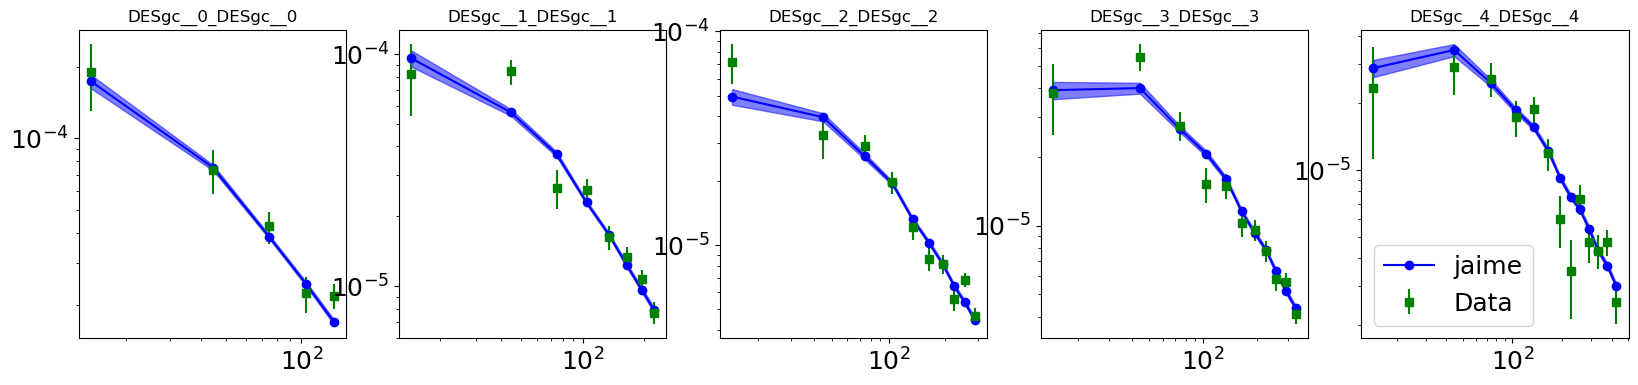

5


In [53]:
figure, axis = plt.subplots(1, 5, figsize=(20, 4))
l = 0
pairs = pairs_gcgc
files = files_gcgc
data = data_gcgc["data"]
err = data_gcgc["err"]
idx = idx_gcgc["idx"]
cls_m, cls_s = make_cls_m_s(theories_dzs_gcgc_nomarg)
for i in range(0,5):
        pair = pairs[l]
        t1, t2 = pair[0], pair[1]
        axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                        data[idx[l]:idx[l+1]], 
                        yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
        axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                        cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
        axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
        axis[i].set_title("{}_{}".format(t1,t2))
        axis[i].set_xscale("log")
        axis[i].set_yscale("log")
        l += 1
plt.legend()
plt.show()
print(l)

['DESwl__0', 'DESwl__0']
['DESwl__0', 'DESwl__1']
['DESwl__0', 'DESwl__2']
['DESwl__0', 'DESwl__3']
['DESwl__1', 'DESwl__1']
['DESwl__1', 'DESwl__2']
['DESwl__1', 'DESwl__3']
['DESwl__2', 'DESwl__2']
['DESwl__2', 'DESwl__3']
['DESwl__3', 'DESwl__3']


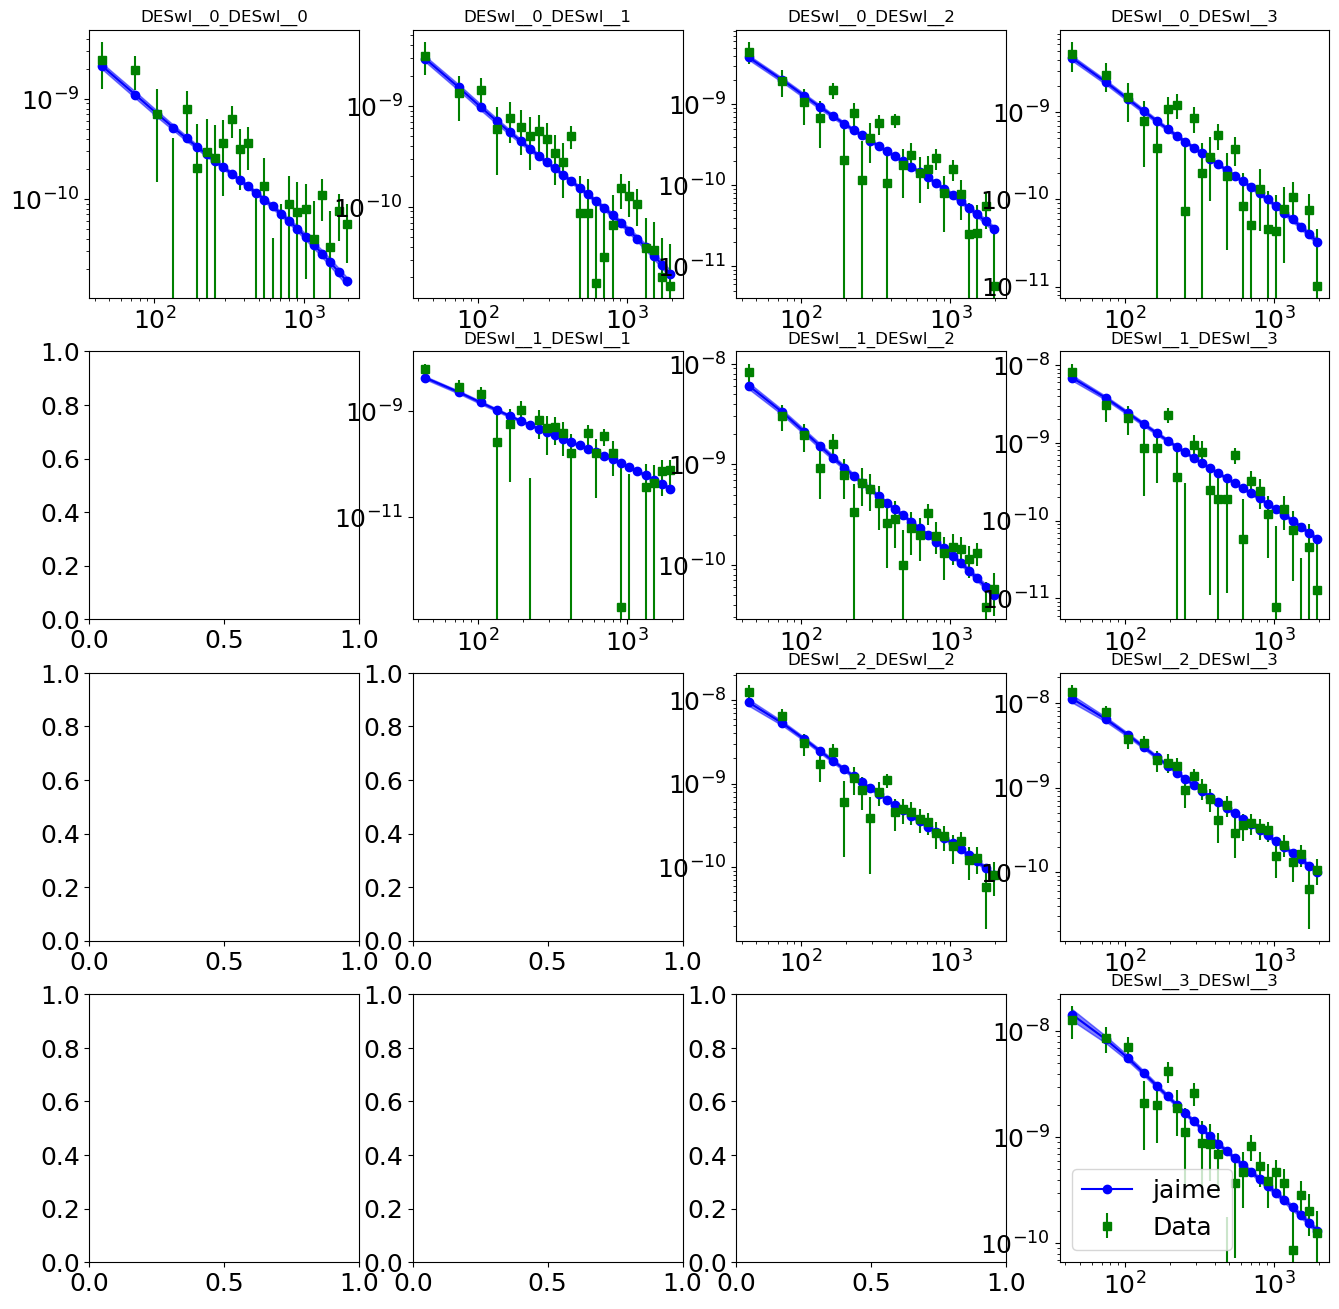

10


In [54]:
figure, axis = plt.subplots(4, 4, figsize=(16,16))
l = 0
pairs = pairs_wlwl
files = files_wlwl
data = data_wlwl["data"]
err = data_wlwl["err"]
idx = idx_wlwl["idx"]
cls_m, cls_s = make_cls_m_s(theories_dzs_wlwl_nomarg)
for i in range(0,4):
    for j in range(0,4):
        if j >= i:
            pair = pairs[l]
            print(pair)
            t1, t2 = pair[0], pair[1]
            axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                         data[idx[l]:idx[l+1]], 
                         yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
            axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                            cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
            axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                            (cls_m+cls_s)[idx[l]:idx[l+1]],
                            (cls_m-cls_s)[idx[l]:idx[l+1]],
                            color="b", alpha=.5)
            #axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
            #                cls_carlos[idx[l]:idx[l+1]],
            #                "ro-", label="carlos")
            axis[i, j].set_title("{}_{}".format(t1,t2))
            axis[i, j].set_xscale("log")
            axis[i, j].set_yscale("log")
            l += 1
plt.legend()
plt.show()
print(l)

['DESgc__0', 'DESgc__0']
['DESgc__1', 'DESgc__1']
['DESgc__2', 'DESgc__2']
['DESgc__3', 'DESgc__3']
['DESgc__4', 'DESgc__4']


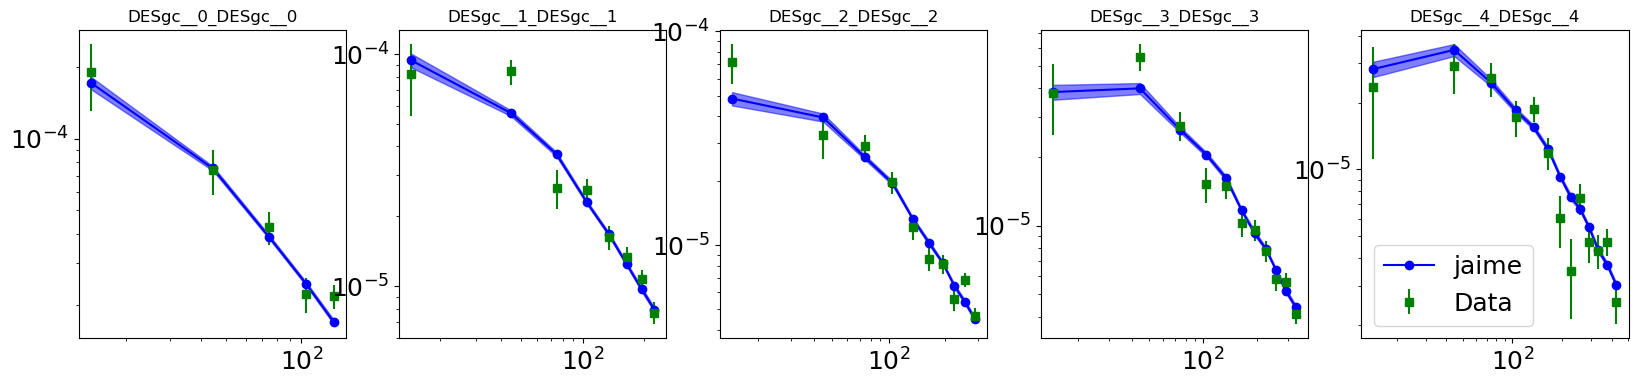

5


In [55]:
figure, axis = plt.subplots(1, 5, figsize=(20, 4))
l = 0
pairs = pairs_3x2
files = files_3x2
data = data_3x2["data"]
err = data_3x2["err"]
idx = idx_3x2["idx"]
cls_m, cls_s = make_cls_m_s(theories_dzs_3x2_nomarg)
for i in range(0,5):
        pair = pairs[l]
        print(pair)
        t1, t2 = pair[0], pair[1]
        axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                        data[idx[l]:idx[l+1]], 
                        yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
        axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                        cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
        axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
        axis[i].set_title("{}_{}".format(t1,t2))
        axis[i].set_yscale("log")
        axis[i].set_xscale("log")
        l += 1
plt.legend()
plt.show()
print(l)

['DESgc__0', 'DESwl__0']
['DESgc__0', 'DESwl__1']
['DESgc__0', 'DESwl__2']
['DESgc__0', 'DESwl__3']
['DESgc__1', 'DESwl__0']
['DESgc__1', 'DESwl__1']
['DESgc__1', 'DESwl__2']
['DESgc__1', 'DESwl__3']
['DESgc__2', 'DESwl__0']
['DESgc__2', 'DESwl__1']
['DESgc__2', 'DESwl__2']
['DESgc__2', 'DESwl__3']
['DESgc__3', 'DESwl__0']
['DESgc__3', 'DESwl__1']
['DESgc__3', 'DESwl__2']
['DESgc__3', 'DESwl__3']
['DESgc__4', 'DESwl__0']
['DESgc__4', 'DESwl__1']
['DESgc__4', 'DESwl__2']
['DESgc__4', 'DESwl__3']


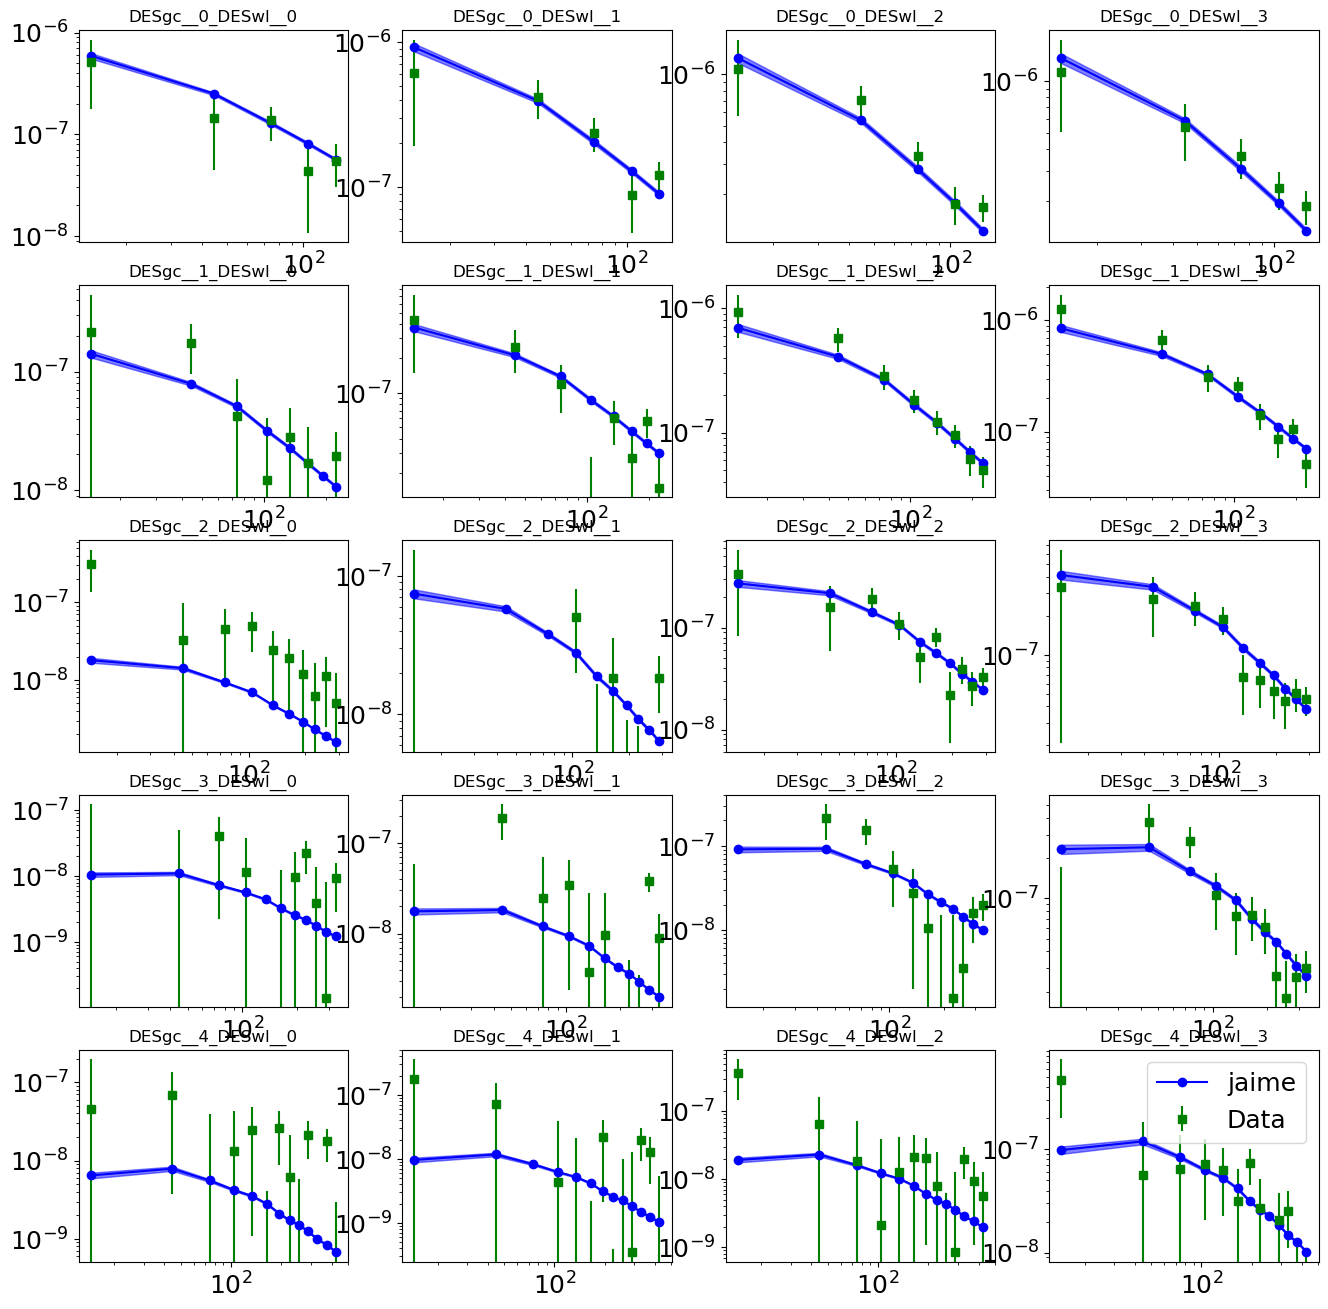

25


In [56]:
figure, axis = plt.subplots(5, 4, figsize=(16,16))
pairs = pairs_3x2
files = files_3x2
data = data_3x2["data"]
err = data_3x2["err"]
idx = idx_3x2["idx"]
cls_m, cls_s = make_cls_m_s(theories_dzs_3x2_nomarg)
l = 5
for i in range(0,5):
    for j in range(0,4):
        pair = pairs[l]
        print(pair)
        t1, t2 = pair[0], pair[1]
        axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
        axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                     cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
        axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
        axis[i, j].set_title("{}_{}".format(t1,t2))
        axis[i, j].set_xscale("log")
        axis[i, j].set_yscale("log")
        l += 1
plt.legend()
plt.show()
print(l)

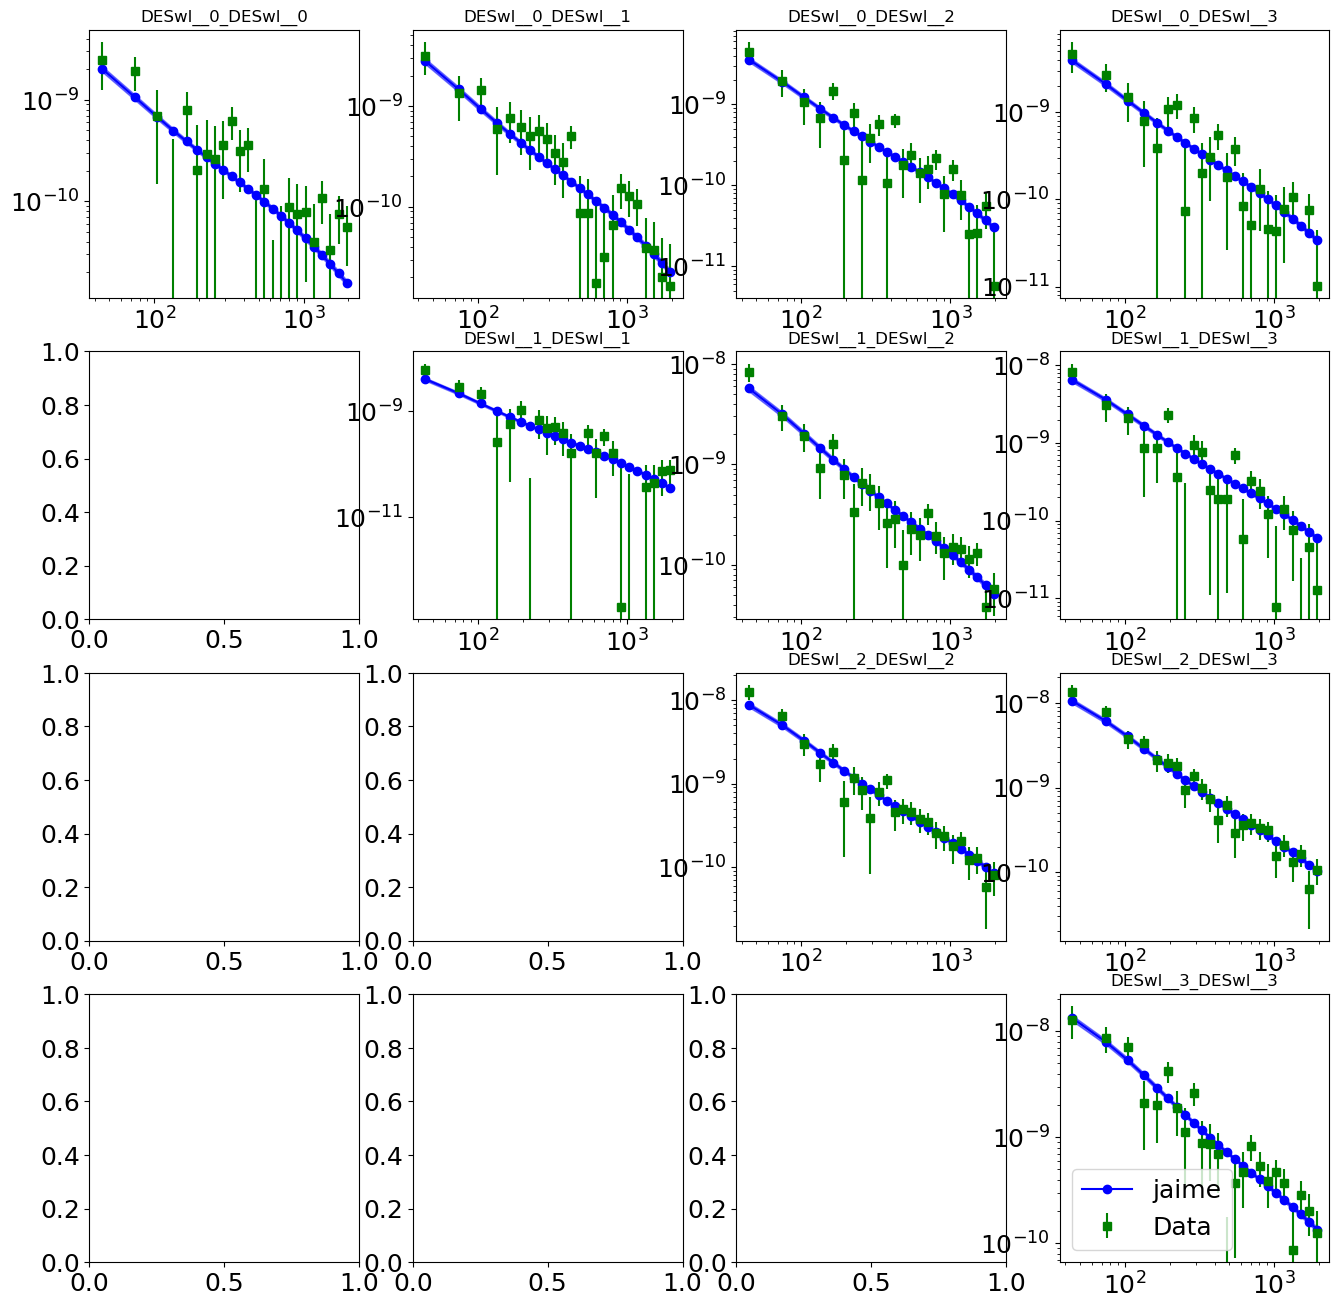

35


In [57]:
figure, axis = plt.subplots(4, 4, figsize=(16,16))
l = 25
pairs = pairs_3x2
files = files_3x2
data = data_3x2["data"]
err = data_3x2["err"]
idx = idx_3x2["idx"]
cls_m, cls_s = make_cls_m_s(theories_dzs_3x2_nomarg)
for i in range(0,4):
    for j in range(0,4):
        if j >= i:
            pair = pairs[l]
            t1, t2 = pair[0], pair[1]
            axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                         data[idx[l]:idx[l+1]], 
                         yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
            axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                            cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
            axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                            (cls_m+cls_s)[idx[l]:idx[l+1]],
                            (cls_m-cls_s)[idx[l]:idx[l+1]],
                            color="b", alpha=.5)
            axis[i, j].set_title("{}_{}".format(t1,t2))
            axis[i, j].set_xscale("log")
            axis[i, j].set_yscale("log")
            l += 1
plt.legend()
plt.show()
print(l)

## Load Chains

In [58]:
def add_chains(paths, start=1, stop=100):
    chains = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"chain_{}.csv".format(i))) & (i<=stop):
            chain = pd.read_csv(path+"chain_{}.csv".format(i))
            chains.append(chain)
            i += 1
    return pd.concat(chains)

In [59]:
dzs_wlwl_num = add_chains([path_dzs_wlwl_num])
des_gcgc_num = add_chains([path_dzs_gcgc_num])
dzs_3x2_num = add_chains([path_dzs_3x2_num])

dzs_wlwl_ana = add_chains([path_dzs_wlwl_ana])
dzs_gcgc_ana = add_chains([path_dzs_gcgc_ana])
dzs_3x2_ana = add_chains([path_dzs_3x2_ana])

nzs_wlwl_ana = add_chains([path_nzs_wlwl_ana])
nzs_gcgc_ana = add_chains([path_nzs_gcgc_ana])
nzs_3x2_ana = add_chains([path_nzs_3x2_ana])

nzs_wlwl_num = add_chains([path_nzs_wlwl_num])
#nzs_gcgc_num = add_chains([path_nzs_gcgc_num])
#nzs_3x2_num = add_chains([path_nzs_3x2_num

dzs_wlwl_nomarg = add_chains([path_dzs_wlwl_nomarg])
dzs_gcgc_nomarg = add_chains([path_dzs_gcgc_nomarg])
dzs_3x2_nomarg = add_chains([path_dzs_3x2_nomarg])

## Plot Data

## Make GetDist

In [60]:
labels_dict = {'h': 'h',
               'Ωm': '\Omega_m',
               'Ωb': '\Omega_b',
               'ns': 'n_s',
               'σ8': '\sigma_8',
               'S8': 'S_8',
               'A_IA': 'A_{IA}',
               'alpha_IA': r'\alpha_{IA}',
               
               'DESgc__0_dz': 'dz_{DESY1gc \, 0}',
               'DESgc__1_dz': 'dz_{DESY1gc \, 1}',
               'DESgc__2_dz': 'dz_{DESY1gc \, 2}',
               'DESgc__3_dz': 'dz_{DESY1gc \, 3}',
               'DESgc__4_dz': 'dz_{DESY1gc \, 4}',
               
               'DESwl__0_dz': 'dz_{DESY1wl \, 0}',
               'DESwl__1_dz': 'dz_{DESY1wl \, 1}',
               'DESwl__2_dz': 'dz_{DESY1wl \, 2}',
               'DESwl__3_dz': 'dz_{DESY1wl \, 3}',
               
               'DESgc__0_b': 'b_{DESY1 \, 0}',
               'DESgc__1_b': 'b_{DESY1 \, 1}',
               'DESgc__2_b': 'b_{DESY1 \, 2}',
               'DESgc__3_b': 'b_{DESY1 \, 3}',
               'DESgc__4_b': 'b_{DESY1 \, 4}',
               
               'DESwl__0_m': 'm_{DESY1 \, 0 }',
               'DESwl__1_m': 'm_{DESY1 \, 1 }',
               'DESwl__2_m': 'm_{DESY1 \, 2 }', 
               'DESwl__3_m': 'm_{DESY1 \, 3 }',
               
               'DESwl__0_b': 'b_{DESY1 \, 0 }',
               'DESwl__1_b': 'b_{DESY1 \, 1 }',
               'DESwl__2_b': 'b_{DESY1 \, 2 }', 
               'DESwl__3_b': 'b_{DESY1 \, 3 }'}

In [61]:
def make_chain(file, label, ranges=dict({}), weight=False, labels_dict=labels_dict):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print(label)
    for param in params:
        #print(param)
        if param in labels_dict.keys():
            #print(param)
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])
    if 'Ωbb' in params:
        #print('Ωb')
        names.append('Ωb')
        labels.append(labels_dict['Ωb'])
        samples.append(0.1*file['Ωbb'])
    if ('σ8' in params) & ('Ωm' in params):
        #print('S8')
        names.append('S8')
        labels.append(labels_dict['S8'])
        samples.append(file['σ8']*np.sqrt(file['Ωm']/0.3))

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))
    if weight == True:
        if "log_density" in params:
            print("applying weights")
            ws = np.array(file['log_density'])
    else:
        ws = None
    print("========")

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges, weights=ws,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [62]:
dzs_wlwl_num_samples = make_chain(dzs_wlwl_num, "WLWL dzs num")
dzs_gcgc_num_samples = make_chain(des_gcgc_num, "GCGC dzs num")
dzs_3x2_num_samples  = make_chain(dzs_3x2_num,  "3x2 dzs num")

dzs_wlwl_ana_samples = make_chain(dzs_wlwl_ana, "WLWL dzs ana")
dzs_gcgc_ana_samples = make_chain(dzs_gcgc_ana, "GCGC dzs ana")
dzs_3x2_ana_samples  = make_chain(dzs_3x2_ana,  "3x2 dzs ana")

nzs_wlwl_ana_samples = make_chain(nzs_wlwl_ana, "WLWL nzs ana")
nzs_gcgc_ana_samples = make_chain(nzs_gcgc_ana, "GCGC nzs ana")
nzs_3x2_ana_samples  = make_chain(nzs_3x2_ana,  "3x2 nzs ana")

nzs_wlwl_num_samples = make_chain(nzs_wlwl_num, "WLWL nzs num")
#nzs_gcgc_num_samples = make_chain(nzs_gcgc_num, "GCGC nzs num")
#nzs_3x2_num_samples  = make_chain(nzs_3x2_num,  "3x2 nzs num")

dzs_wlwl_nomarg_samples = make_chain(dzs_wlwl_nomarg, "WLWL nomarg")
dzs_gcgc_nomarg_samples = make_chain(dzs_gcgc_nomarg, "GCGC nomarg")
dzs_3x2_nomarg_samples  = make_chain(dzs_3x2_nomarg,  "3x2 nomarg")

WLWL dzs num
Removed no burn in
GCGC dzs num
Removed no burn in
3x2 dzs num
Removed no burn in
WLWL dzs ana
Removed no burn in
GCGC dzs ana
Removed no burn in
3x2 dzs ana
Removed no burn in
WLWL nzs ana
Removed no burn in
GCGC nzs ana
Removed no burn in
3x2 nzs ana
Removed no burn in
WLWL nzs num
Removed no burn in
WLWL nomarg
Removed no burn in
GCGC nomarg
Removed no burn in
3x2 nomarg
Removed no burn in


In [63]:
LSST_markers = {'h': 0.6736,
               'Ωm': 0.313,
               'Ωb': 0.049,
               'ns': 0.9649,
               's8': 0.82,
               'S8': 0.82 * np.sqrt(0.313/0.3)}

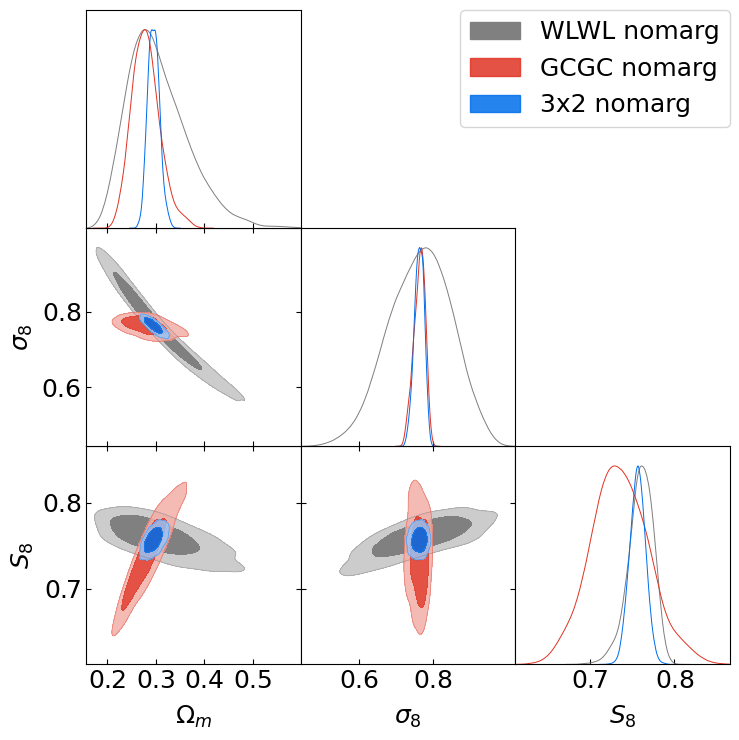

In [64]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([dzs_wlwl_nomarg_samples,
                 dzs_gcgc_nomarg_samples,
                 dzs_3x2_nomarg_samples], 
                 ['Ωm', 'σ8', 'S8'],
                 filled=[True, True, True])

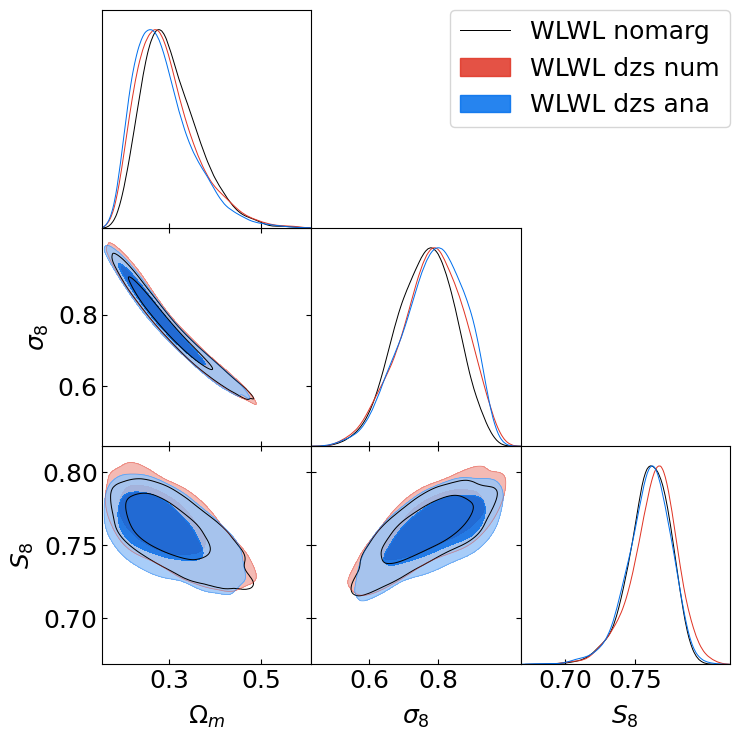

In [65]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([dzs_wlwl_nomarg_samples,
                 dzs_wlwl_num_samples,
                 dzs_wlwl_ana_samples], 
                 ['Ωm', 'σ8', 'S8'],
                 filled=[False, True, True])

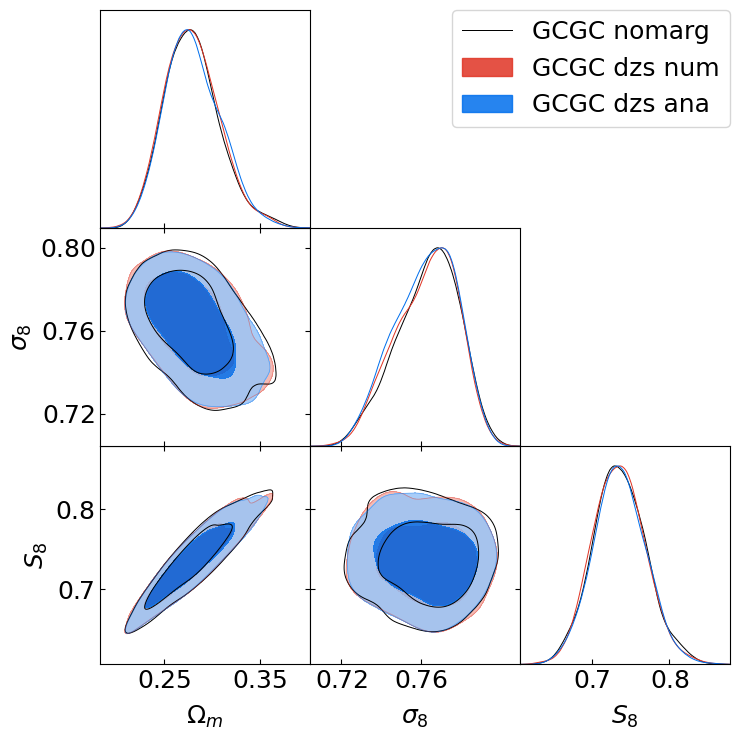

In [66]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([dzs_gcgc_nomarg_samples,
                 dzs_gcgc_num_samples,
                 dzs_gcgc_ana_samples],
                 ['Ωm', 'σ8', 'S8'],
                 filled=[False, True, True])

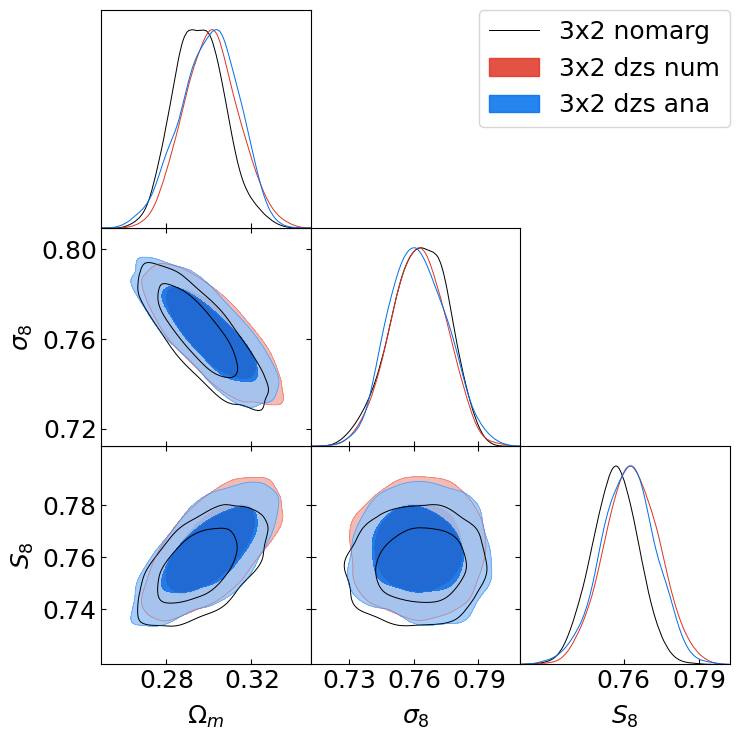

In [67]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([dzs_3x2_nomarg_samples,
                 dzs_3x2_num_samples,
                 dzs_3x2_ana_samples], 
                 ['Ωm', 'σ8', 'S8'],
                 filled=[False, True, True])

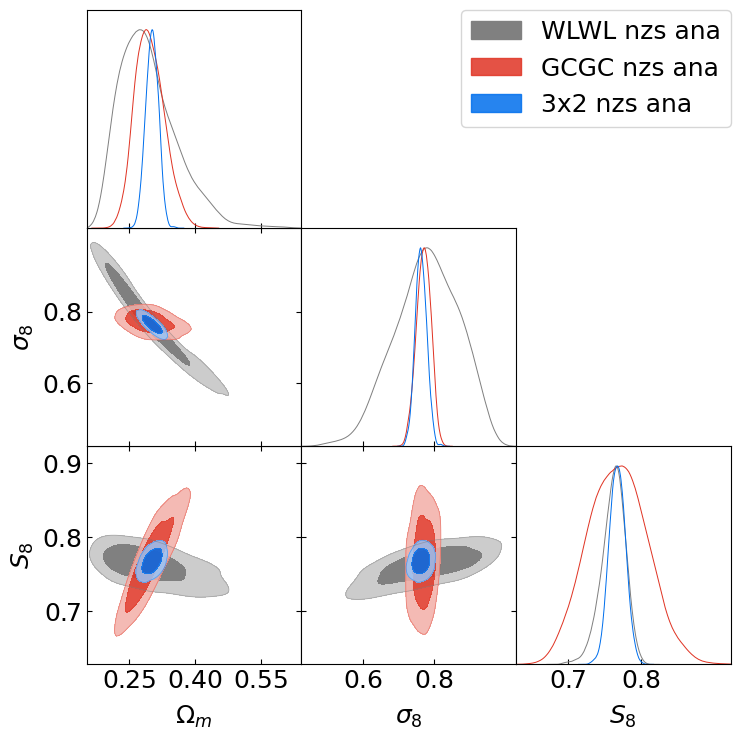

In [68]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([nzs_wlwl_ana_samples,
                 nzs_gcgc_ana_samples,
                 nzs_3x2_ana_samples], 
                 ['Ωm', 'σ8', 'S8'],
                 filled=[True, True, True])

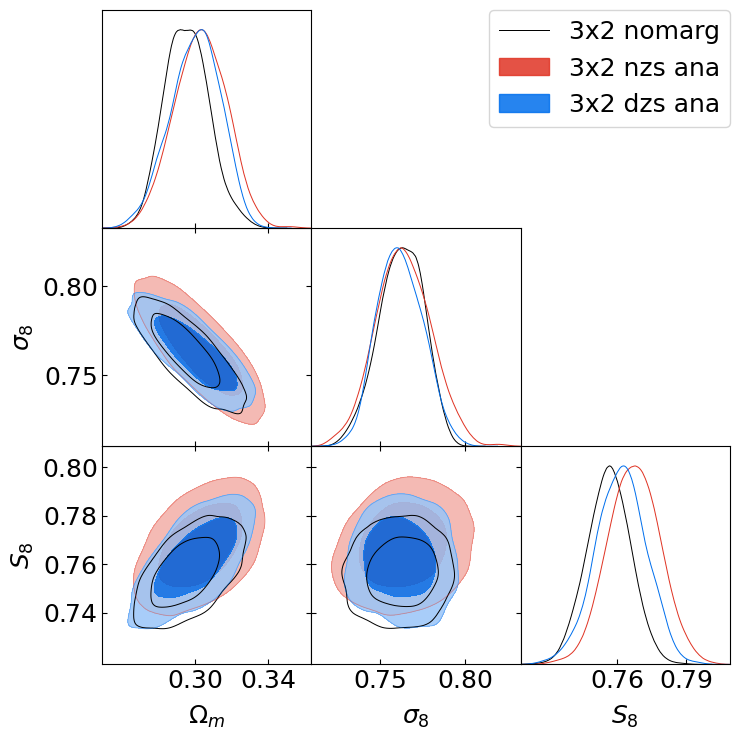

In [69]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([dzs_3x2_nomarg_samples,
                 nzs_3x2_ana_samples,
                 dzs_3x2_ana_samples], 
                 ['Ωm', 'σ8', 'S8'],
                 filled=[False, True, True])

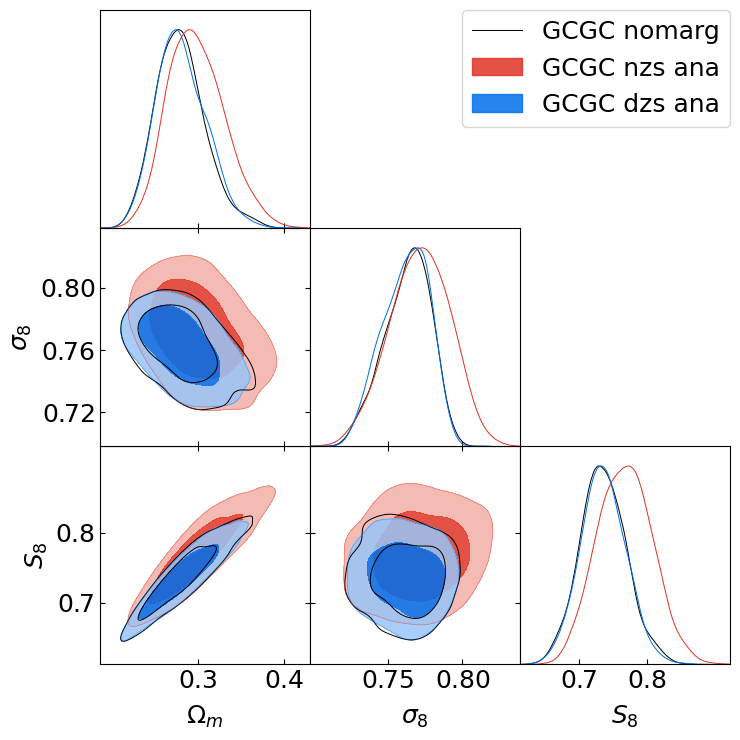

In [70]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([dzs_gcgc_nomarg_samples,
                 nzs_gcgc_ana_samples,
                 dzs_gcgc_ana_samples], 
                 ['Ωm', 'σ8', 'S8'],
                 filled=[False, True, True])

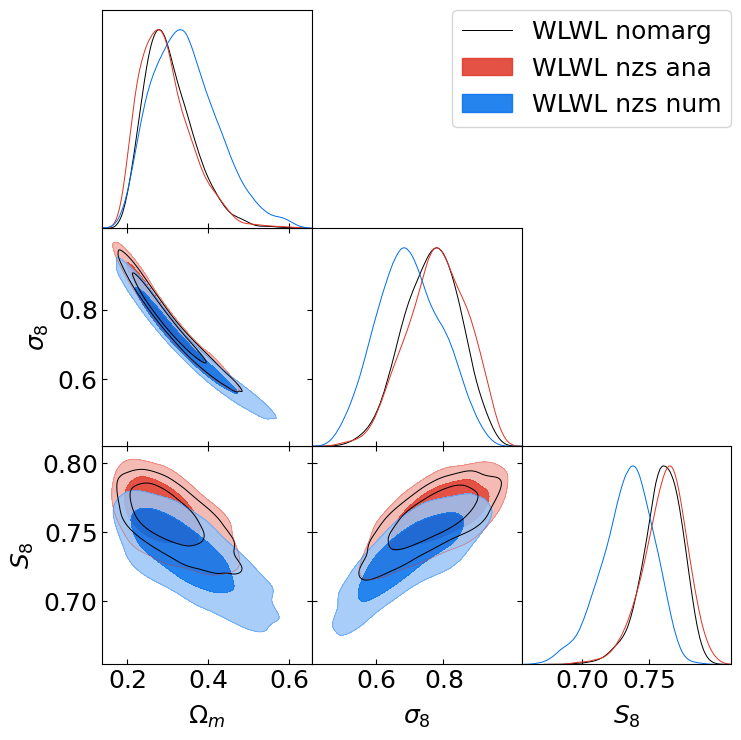

In [141]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([dzs_wlwl_nomarg_samples,
                 nzs_wlwl_ana_samples,
                 nzs_wlwl_num_samples], 
                 ['Ωm', 'σ8', 'S8'],
                 filled=[False, True, True])

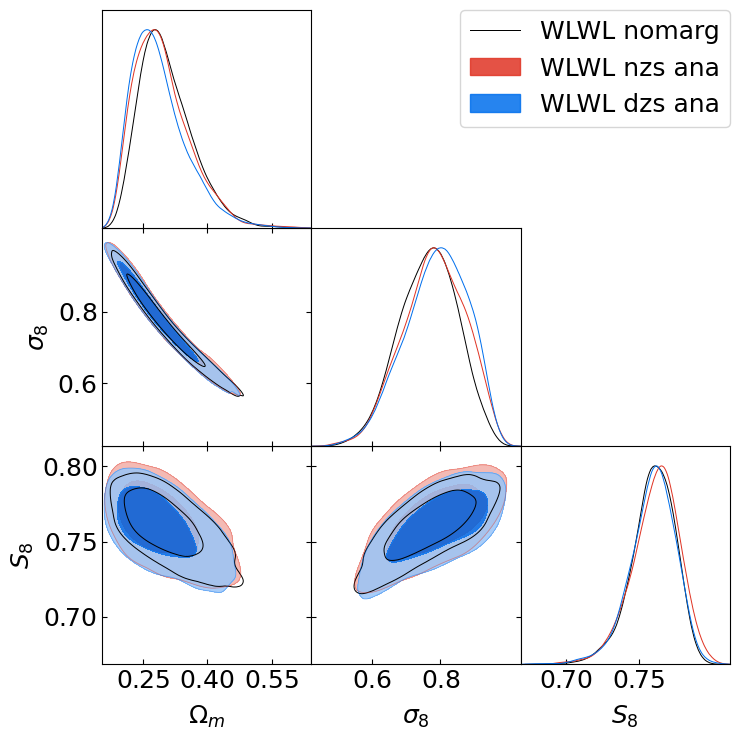

In [72]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([dzs_wlwl_nomarg_samples,
                 nzs_wlwl_ana_samples,
                 dzs_wlwl_ana_samples], 
                 ['Ωm', 'σ8', 'S8'],
                 filled=[False, True, True])

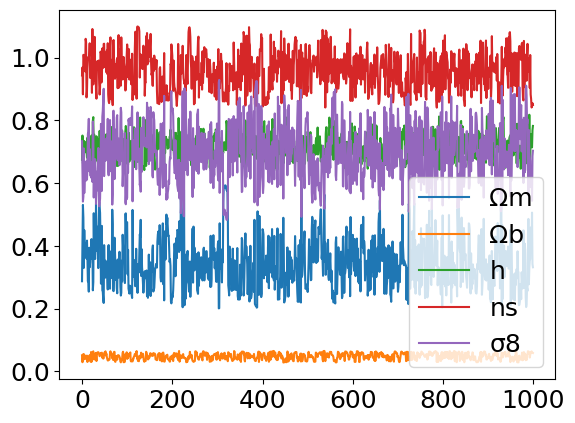

In [78]:
plt.plot(np.array(nzs_wlwl_num['Ωm']), label='Ωm')
plt.plot(0.1*np.array(nzs_wlwl_num['Ωbb']), label='Ωb')
plt.plot(np.array(nzs_wlwl_num['h']), label='h')
plt.plot(np.array(nzs_wlwl_num['ns']), label='ns')
plt.plot(np.array(nzs_wlwl_num['σ8']), label='σ8')
plt.legend()
plt.show()

In [97]:
print(np.std(nzs_wlwl_num['Ωm']),
        np.std(nzs_wlwl_num['Ωbb']),
        np.std(nzs_wlwl_num['h']),
        np.std(nzs_wlwl_num['ns']),
        np.std(nzs_wlwl_num['σ8']))

0.07974834010334801 0.1022726596329235 0.040712600737917895 0.06102702506068621 0.09283749550109605


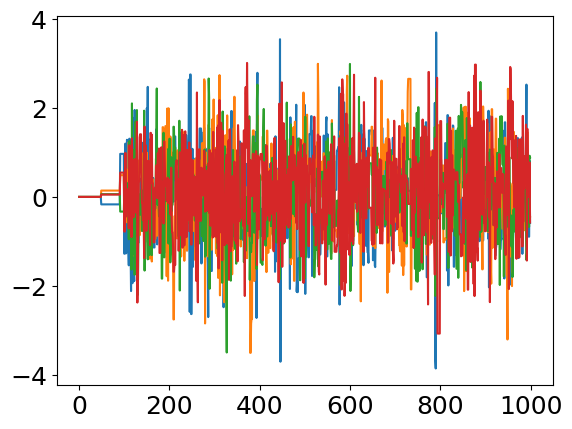

In [77]:
plt.plot(np.array(nzs_wlwl_num['DESwl__0_a[1]']), label='Ωm')
plt.plot(np.array(nzs_wlwl_num['DESwl__0_a[10]']), label='Ωm')
plt.plot(np.array(nzs_wlwl_num['DESwl__0_a[30]']), label='Ωm')
plt.plot(np.array(nzs_wlwl_num['DESwl__0_a[40]']), label='Ωm')

In [110]:
alphas_0 = np.array([np.array(nzs_wlwl_num[f'DESwl__0_a[{i}]']) for i in range(1, 41)])
alphas_1 = np.array([np.array(nzs_wlwl_num[f'DESwl__1_a[{i}]']) for i in range(1, 41)])
alphas_2 = np.array([np.array(nzs_wlwl_num[f'DESwl__2_a[{i}]']) for i in range(1, 41)])
alphas_3 = np.array([np.array(nzs_wlwl_num[f'DESwl__3_a[{i}]']) for i in range(1, 41)])

In [103]:
nz_path = "./data/DESY1/nzs/"
nz_DESwl__0 = np.load(nz_path + "nz_DESwl__0.npz")
nz_DESwl__1 = np.load(nz_path + "nz_DESwl__1.npz")
nz_DESwl__2 = np.load(nz_path + "nz_DESwl__2.npz")
nz_DESwl__3 = np.load(nz_path + "nz_DESwl__3.npz")
zs_k0, nz_k0, cov_k0 = nz_DESwl__0["z"], nz_DESwl__0["dndz"], nz_DESwl__0["cov"]
zs_k1, nz_k1, cov_k1 = nz_DESwl__1["z"], nz_DESwl__1["dndz"], nz_DESwl__1["cov"]
zs_k2, nz_k2, cov_k2 = nz_DESwl__2["z"], nz_DESwl__2["dndz"], nz_DESwl__2["cov"]
zs_k3, nz_k3, cov_k3 = nz_DESwl__3["z"], nz_DESwl__3["dndz"], nz_DESwl__3["cov"]

In [129]:
nzs_0 = np.array([nz_k0 + np.linalg.cholesky(cov_k0) @ alphas_0.T[i] for i in range(0, len(alphas_0[0]))])
nzs_1 = np.array([nz_k1 + np.linalg.cholesky(cov_k1) @ alphas_1.T[i] for i in range(0, len(alphas_1[0]))])
nzs_2 = np.array([nz_k2 + np.linalg.cholesky(cov_k2) @ alphas_2.T[i] for i in range(0, len(alphas_2[0]))])
nzs_3 = np.array([nz_k3 + np.linalg.cholesky(cov_k3) @ alphas_3.T[i] for i in range(0, len(alphas_3[0]))])

nzs_0_m = np.mean(nzs_0, 0)
nzs_1_m = np.mean(nzs_1, 0)
nzs_2_m = np.mean(nzs_2, 0)
nzs_3_m = np.mean(nzs_3, 0)

nzs_0_s = np.std(nzs_0, 0)
nzs_1_s = np.std(nzs_1, 0)
nzs_2_s = np.std(nzs_2, 0)
nzs_3_s = np.std(nzs_3, 0)

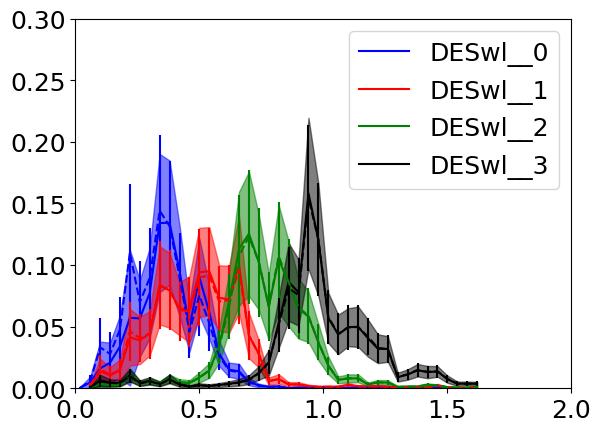

In [140]:
plt.plot(zs_k0, nzs_0_m, 'b-', label='DESwl__0')
plt.fill_between(zs_k0, nzs_0_m+nzs_0_s, nzs_0_m-nzs_0_s, color='b', alpha=0.5)
plt.errorbar(zs_k0, nz_k0, yerr=np.sqrt(np.diag(cov_k0)), fmt='b--')

plt.plot(zs_k1, nzs_1_m, 'r-', label='DESwl__1')
plt.fill_between(zs_k1, nzs_1_m+nzs_1_s, nzs_1_m-nzs_1_s, color='r', alpha=0.5)
plt.errorbar(zs_k1, nz_k1, yerr=np.sqrt(np.diag(cov_k1)), fmt='r--')

plt.plot(zs_k2, nzs_2_m, 'g-', label='DESwl__2')
plt.fill_between(zs_k2, nzs_2_m+nzs_2_s, nzs_2_m-nzs_2_s, color='g', alpha=0.5)
plt.errorbar(zs_k2, nz_k2, yerr=np.sqrt(np.diag(cov_k2)), fmt='g--')

plt.plot(zs_k3, nzs_3_m, 'k-', label='DESwl__3')
plt.fill_between(zs_k3, nzs_3_m+nzs_3_s, nzs_3_m-nzs_3_s, color='k', alpha=0.5)
plt.errorbar(zs_k3, nz_k3, yerr=np.sqrt(np.diag(cov_k3)), fmt='k--')

plt.ylim(0, 0.3)
plt.xlim(0, 2)

plt.legend()
plt.show()